#**Importing libraries and reading data**

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('breast-cancer.csv')

#**Quick view**

In [ ]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
#number of rows in each column
df.count()

id                         569
diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
dtype: i

In [ ]:
#number of columns
print("-the number of columns is :",df.columns.size)
print("-the number of rows is :", len(df)) #df.shape[0]
print("-the data shape is :",df.shape)
print("-the total number of elements in the dataset is:",df.size)
print("-the columns name are ",df.columns)


-the number of columns is : 32
-the number of rows is : 569
-the data shape is : (569, 32)
-the total number of elements in the dataset is: 18208
-the columns name are  Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
#getting the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**We can conclude that there are no nulls in the data but there is need for data convertion or data drop we will see later .**


In [ ]:
#datatypes
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

**We have to encode the diagnosis .**

In [ ]:
#Data inspection
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


**From the statistics we see we might need sclaing but we will see later .**

In [ ]:
#searching for the unique values
for i in df.columns:
  print(i ,":",df[i].unique())
  print(df[i].nunique())
  print("______________________________________")

id : [   842302    842517  84300903  84348301  84358402    843786    844359
  84458202    844981  84501001    845636  84610002    846226    846381
  84667401  84799002    848406  84862001    849014   8510426   8510653
   8510824   8511133    851509    852552    852631    852763    852781
    852973    853201    853401    853612  85382601    854002    854039
    854253    854268    854941    855133    855138    855167    855563
    855625    856106  85638502    857010  85713702     85715    857155
    857156    857343    857373    857374    857392    857438  85759902
    857637    857793    857810    858477    858970    858981    858986
    859196  85922302    859283    859464    859465    859471    859487
    859575    859711    859717    859983   8610175   8610404   8610629
   8610637   8610862   8610908    861103   8611161   8611555   8611792
   8612080   8612399  86135501  86135502    861597    861598    861648
    861799    861853    862009    862028     86208     86211    862261
 

**Okay we can conclude that the id has 569 unique values which will not be useful to the model , the diagnosis needs encoding , the other columns we will see how to deal with them later .**

#**DataDescription**

* **id:** Unique identifier for each patient (sample).

* **diagnosis:** Diagnosis of the tumor ('M' = malignant, 'B' = benign).

* **radius_mean:** Mean of distances from the center to points on the perimeter of the tumor (average radius).

* **texture_mean:** Standard deviation of gray-scale values (texture average).

* **perimeter_mean:** Mean size of the core tumor perimeter (average perimeter).

* **area_mean:** Mean area of the tumor (average area).

* **smoothness_mean:** Mean of local variation in radius lengths (average smoothness).

* **compactness_mean**: Mean of (perimeter^2 / area - 1.0) (average compactness).

* **concavity_mean:** Mean of the severity of concave portions of the contour (average concavity).

* **concave points_mean:** Mean of the number of concave portions of the contour (average number of concave points).

* **symmetry_mean:** Mean symmetry of the tumor (average symmetry).

* **fractal_dimension_mean:** Mean of the "coastline approximation" (average fractal dimension).
# **Standard Error Columns:**

* **radius_se:** Standard error for the radius.

* **texture_se:** Standard error for texture.

* **perimeter_se:** Standard error for the perimeter.

* **area_se:** Standard error for the area.

* **smoothness_se:** Standard error for smoothness.

* **compactness_se:** Standard error for compactness.

* **concavity_se:** Standard error for concavity.

* **concave points_se:** Standard error for concave points.

* **symmetry_se:** Standard error for symmetry.

* **fractal_dimension_se:** Standard error for fractal dimension.
# **Worst (Largest) Values Columns:**

* **radius_worst:** "Worst" or largest mean value for radius.

* **texture_worst:** "Worst" or largest mean value for texture.

* **perimeter_worst:** "Worst" or largest mean value for perimeter.

* **area_worst:** "Worst" or largest mean value for area.

* **smoothness_worst:** "Worst" or largest mean value for smoothness.

* **compactness_worst:** "Worst" or largest mean value for compactness.

* **concavity_worst:** "Worst" or largest mean value for concavity.

* **concave points_worst:** "Worst" or largest mean value for concave points.

* **symmetry_worst:** "Worst" or largest mean value for symmetry.

* **fractal_dimension_worst:** "Worst" or largest mean value for fractal dimension.
#**Summary:**
* **Mean columns (columns 3-12):** These provide the mean values of the respective features.

* **Standard error columns (columns 13-22):** These provide the standard error of the respective features, indicating the variability.

* **Worst columns (columns 23-32):** These provide the worst (largest) values of the respective features.

#**Analysis**

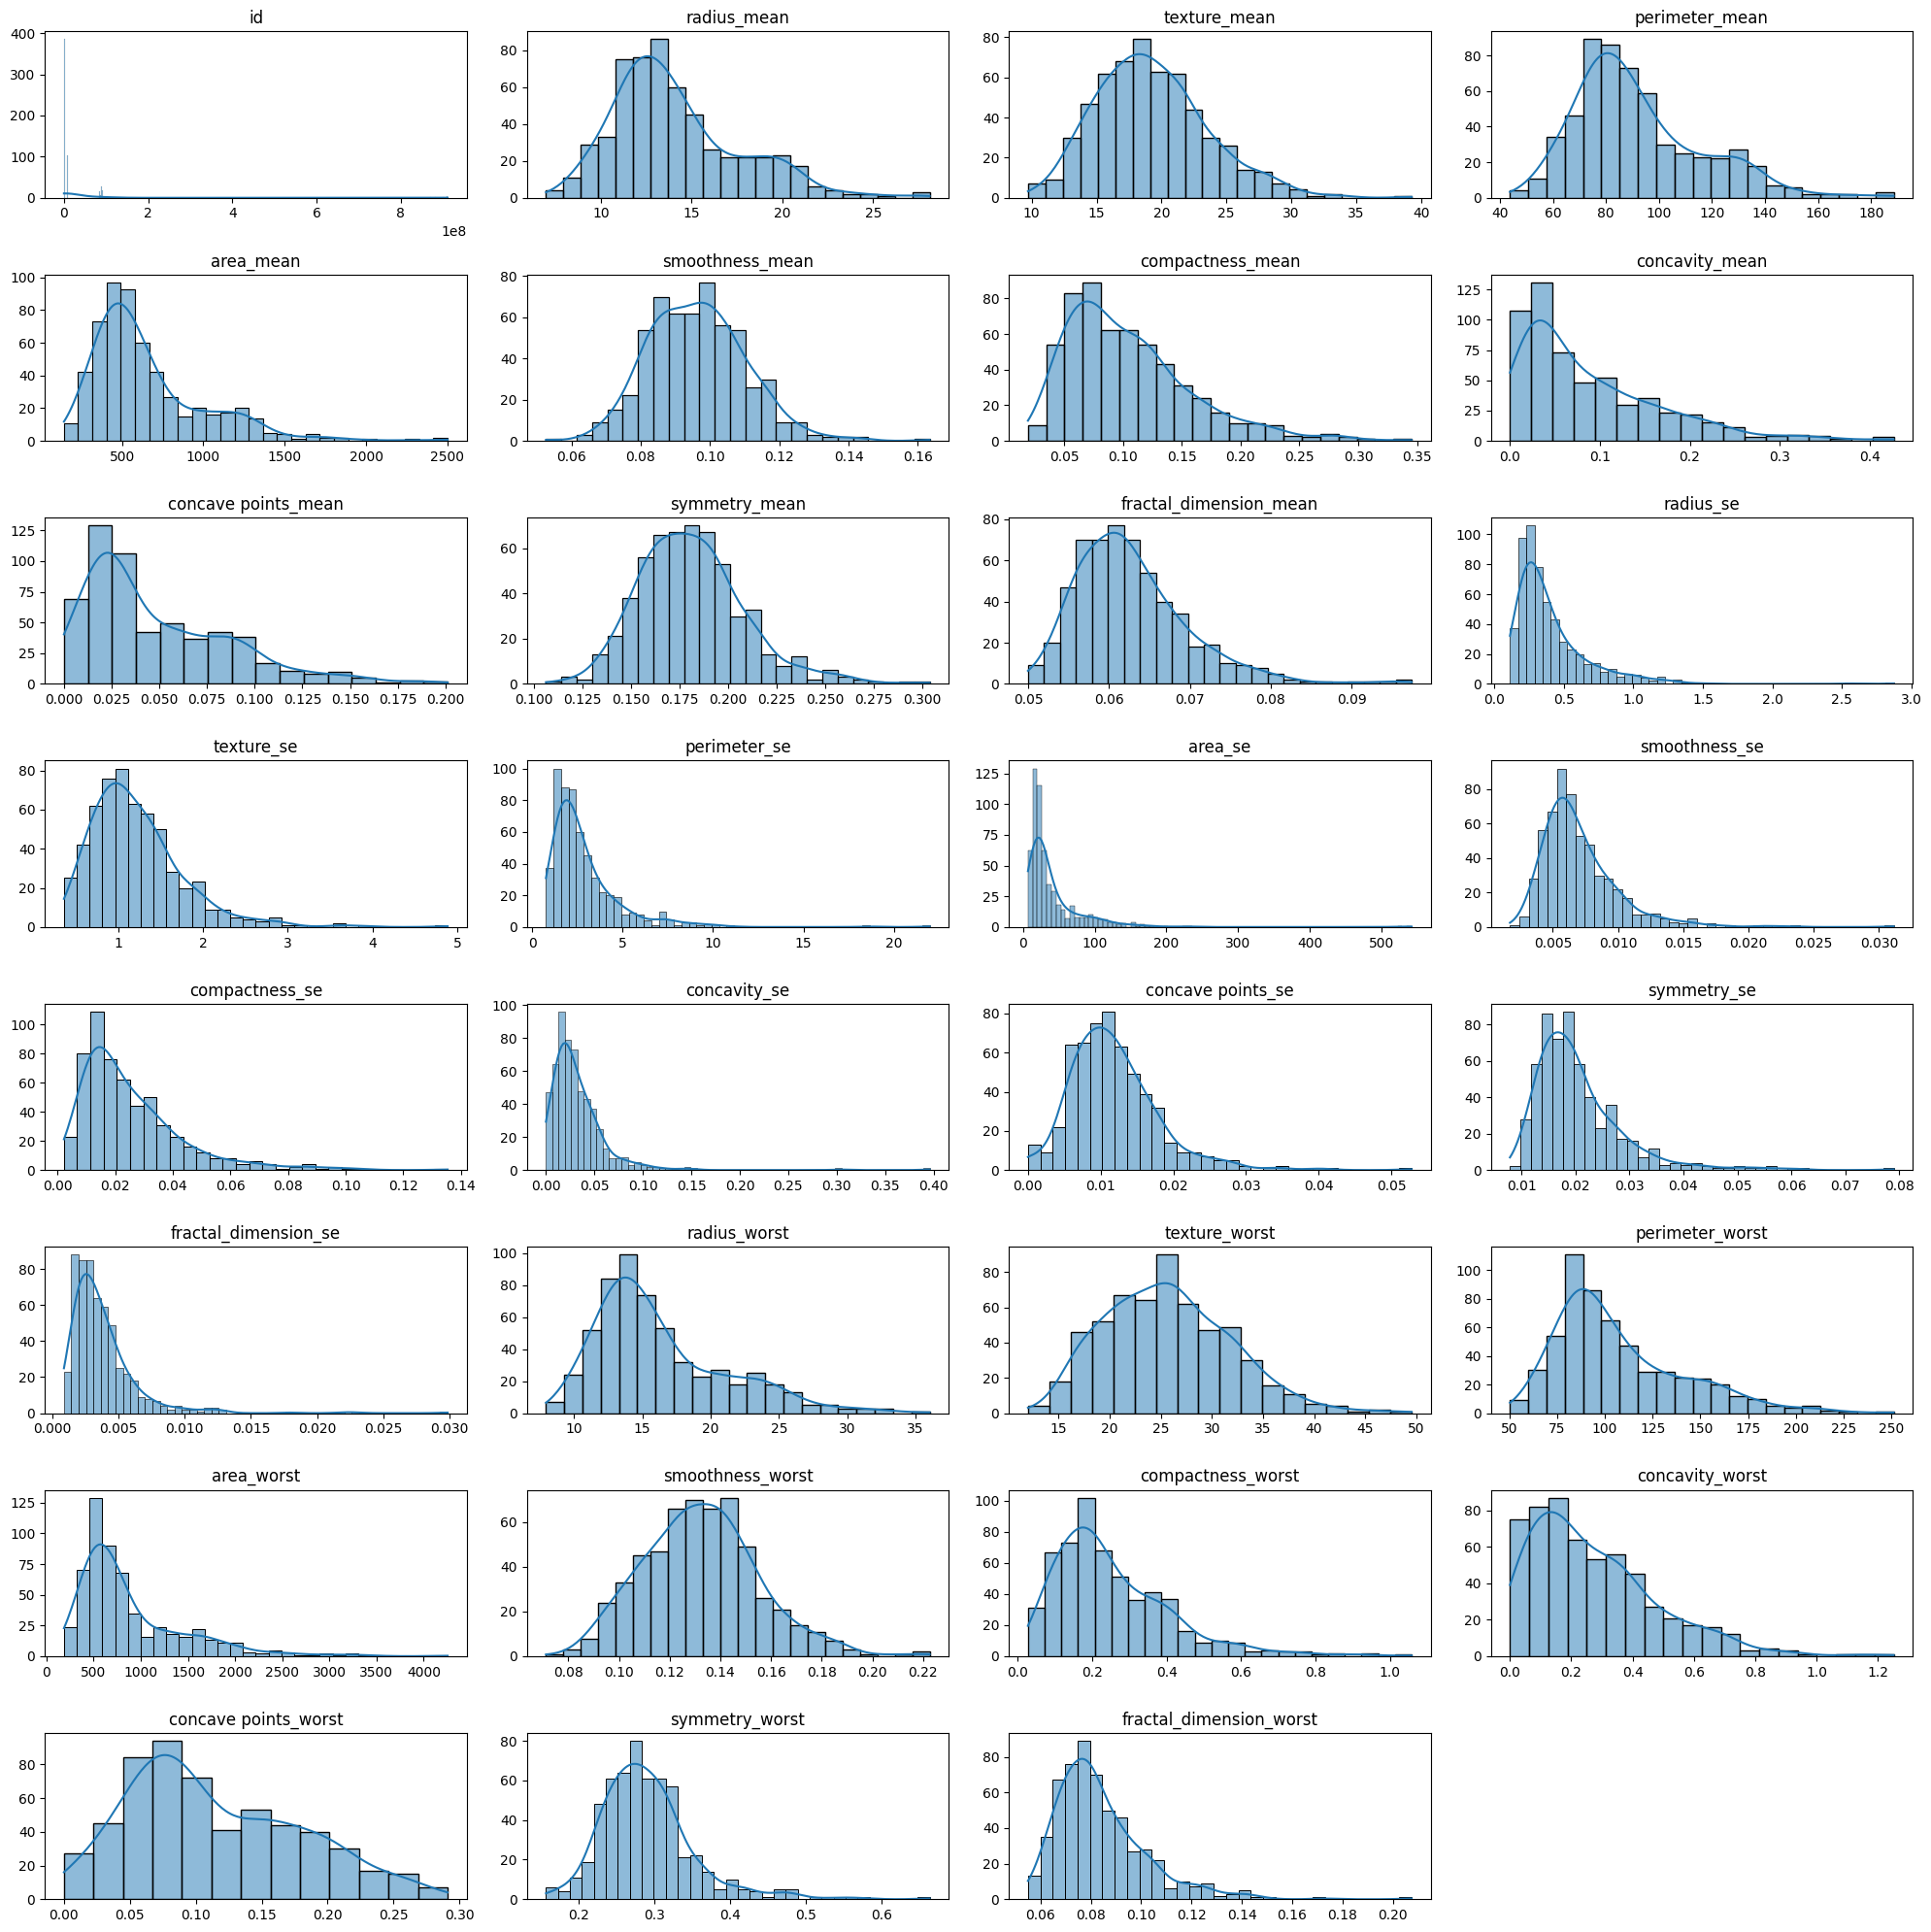

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot distribution for each numeric column
plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(8, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

**The data needs some transformation .**

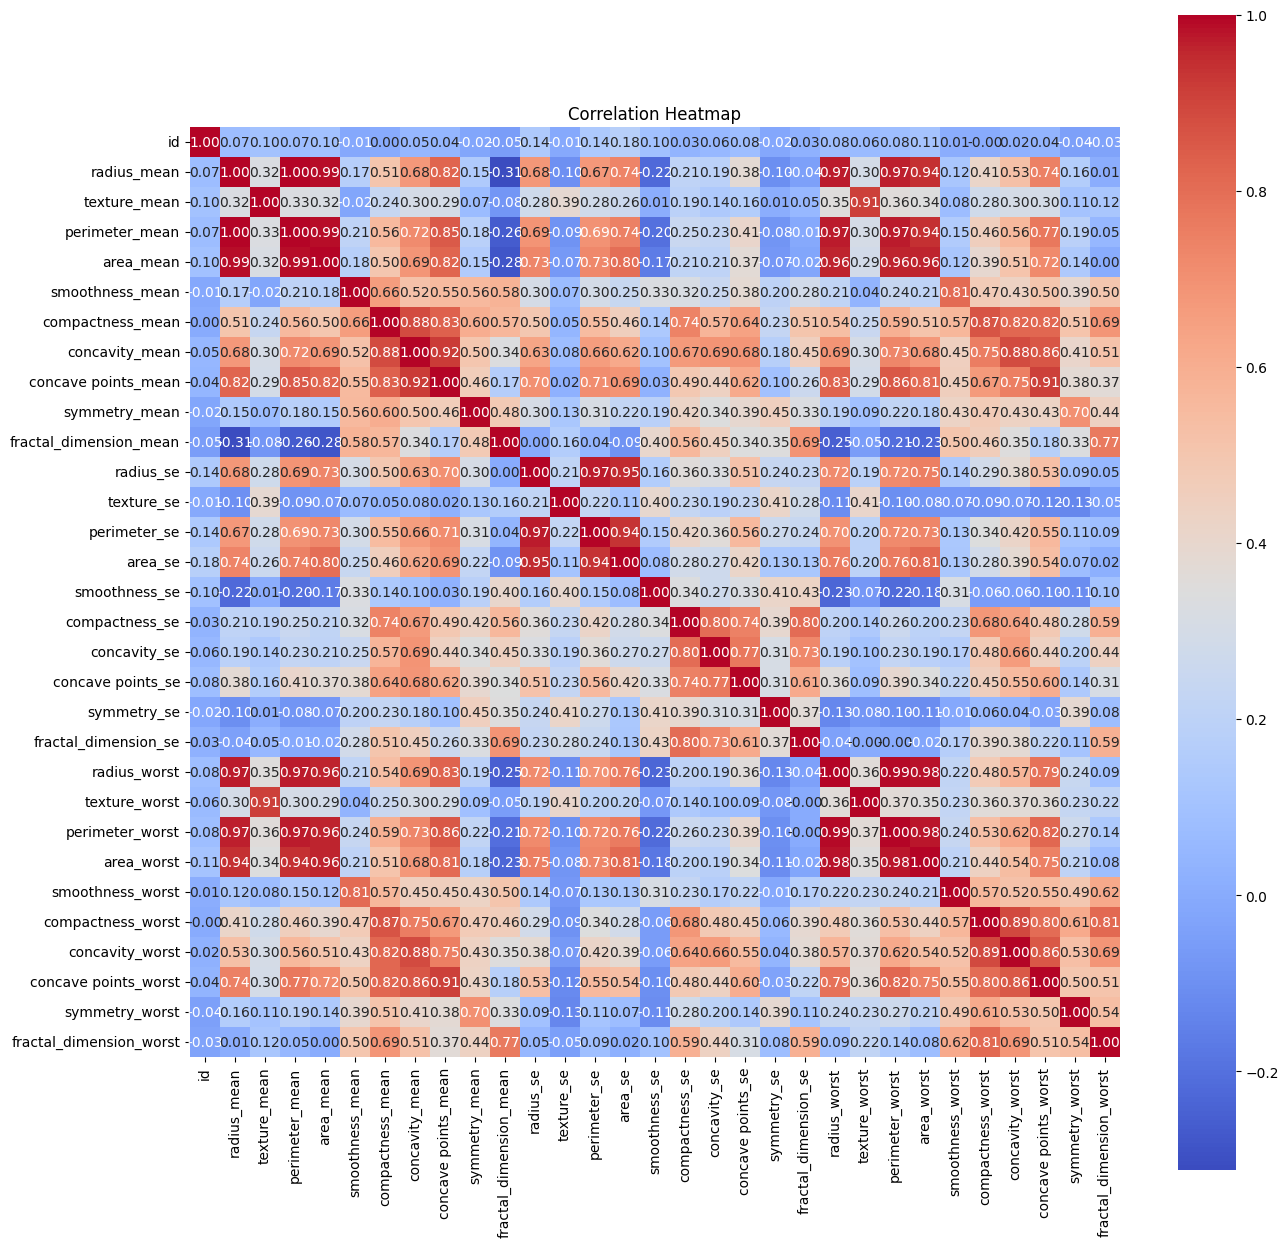

                               id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se                0.143048     0.

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
dff=df[numeric_columns]
corr_matrix = dff.corr()

# Generate a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()
print(dff.corr())


#**Preprocessing**

##**Nulls**

In [ ]:
#checking nulls
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**There are no nulls to handel .**

##**Duplicates**

In [ ]:
#checking the duplicates
df.duplicated().sum()

0

**Duplicates also are handeled .**

##**Datatypes**

In [ ]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

**i'ts time for encoding the diagnosis .**

##**Encoding**

**Let's together discuss the encoding types**
* **1-Label encoding**

    Assigns a unique integer to each category
* **2-One-hot encoding**

    Creates binary columns for each category and assigns 1 to the corresponding category column
* **3-Ordinal encoding**

    Similar to label encoding but explicitly specifies an order for categories

* **4-Binary encoding**

    Converts categories into binary representation and uses multiple columns to represent the categories
* **5-Hashing encoding**

    Hashes categorical variables into numerical values
* **6-Target/mean encoding**

    Replaces categories with the average value of the target variable for that category
* **7-Frequency encoding**

    Replaces categories with their frequencies (counts) in the dataset
* **8-Feature hashing**

    Converts categorical variables into a numerical representation using hash functions

In [ ]:
df.select_dtypes(include='object')

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [ ]:
dff=df[['diagnosis']]
for i in dff.columns :
  print(i ," COLUMN : ",dff[i].unique())
  print(dff[i].nunique())
  print("___________________________")

diagnosis  COLUMN :  ['M' 'B']
2
___________________________


In [ ]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [ ]:
df = df.drop(columns=['id'])

**Since the id will not add information to us ,so we can drop it .**

##**Outliers**

In [ ]:
#outliers percentage
outliers_percentage = {}
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percentage_outliers = (len(outliers) / len(df)) * 100

    outliers_percentage[col] = percentage_outliers

# Print the percentage of outliers for each column
for col, percentage in outliers_percentage.items():
    print(f"Percentage of outliers in {col}: {percentage:.2f}%")

Percentage of outliers in diagnosis: 0.00%
Percentage of outliers in radius_mean: 2.46%
Percentage of outliers in texture_mean: 1.23%
Percentage of outliers in perimeter_mean: 2.28%
Percentage of outliers in area_mean: 4.39%
Percentage of outliers in smoothness_mean: 1.05%
Percentage of outliers in compactness_mean: 2.81%
Percentage of outliers in concavity_mean: 3.16%
Percentage of outliers in concave points_mean: 1.76%
Percentage of outliers in symmetry_mean: 2.64%
Percentage of outliers in fractal_dimension_mean: 2.64%
Percentage of outliers in radius_se: 6.68%
Percentage of outliers in texture_se: 3.51%
Percentage of outliers in perimeter_se: 6.68%
Percentage of outliers in area_se: 11.42%
Percentage of outliers in smoothness_se: 5.27%
Percentage of outliers in compactness_se: 4.92%
Percentage of outliers in concavity_se: 3.87%
Percentage of outliers in concave points_se: 3.34%
Percentage of outliers in symmetry_se: 4.75%
Percentage of outliers in fractal_dimension_se: 4.92%
Percen

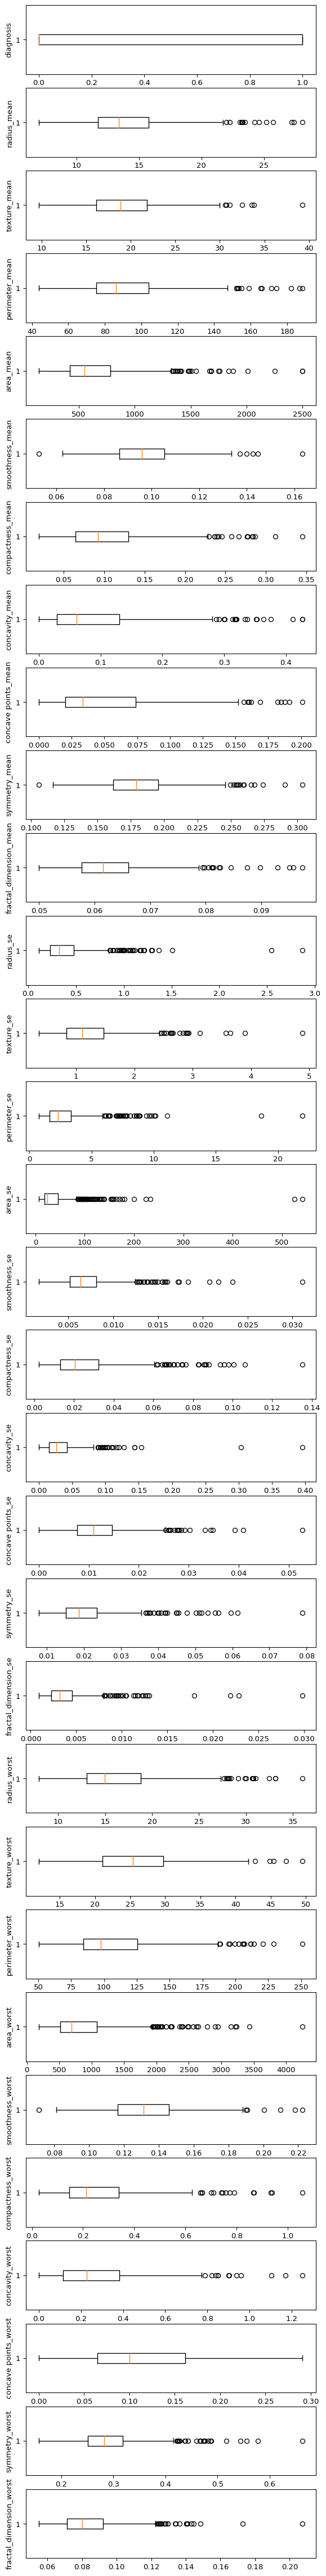

In [ ]:
num_columns = len(df.columns)
fig, axs = plt.subplots(num_columns,1,dpi=95, figsize=(7,num_columns*2))
i = 0
for col in df.columns:
  axs[i].boxplot(df[col].values, vert=False)
  axs[i].set_ylabel(col)
  i+=1
plt.show()

In [ ]:
def replace_outliers_inplace(df):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers inplace
        df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

    return df

**1. Identifying Outliers**
You can use statistical methods to identify outliers in your dataset. Common techniques include:

- Z-score: Measures the number of standard deviations a data point is from the mean.
- IQR (Interquartile Range): Measures the spread of the middle 50% of the data.

**2. Handling Outliers**

Once identified, you can either drop or replace the outliers. Here are the common approaches:

- Drop Outliers: Remove the rows containing outliers.

- Replace Outliers: Replace outliers with a specific value such as the mean, median, or a value at the boundaries of the normal range.

**What to Choose**

- Drop Outliers: If outliers are due to data entry errors or if they are not representative of the population you are studying.
- Replace Outliers: If outliers are valid observations but you want to minimize their impact on your analysis.

**Removing Outliers**

For features with low percentages of outliers (e.g., less than 5%), removing outliers can be a straightforward approach:

 Features to remove outliers:
- radius_mean (2.46%)
- texture_mean (1.23%)
- perimeter_mean (2.28%)
- smoothness_mean (1.05%)
- compactness_mean (2.81%)
- concavity_mean (3.16%)
- concave points_mean (1.76%)
- symmetry_mean (2.64%)
- fractal_dimension_mean (2.64%)
- texture_se (3.51%)
- compactness_se (4.92%)
- concavity_se (3.87%)
- concave points_se (3.34%)
- symmetry_se (4.75%)
- fractal_dimension_se (4.92%)
- radius_worst (2.99%)
- texture_worst (0.88%)
- perimeter_worst (2.64%)
- smoothness_worst (1.23%)
- compactness_worst (2.81%)
- concavity_worst (2.11%)
- symmetry_worst (4.04%)
- fractal_dimension_worst (4.22%)

**Replacing Outliers**

For features with higher percentages of outliers (e.g., more than 5%), replacing outliers might be more appropriate to retain more data:

Features to replace outliers:
- area_mean (4.39%) – borderline case, but can be replaced
- radius_se (6.68%)
- perimeter_se (6.68%)
- area_se (11.42%)
- smoothness_se (5.27%)
- symmetry_worst (4.04%) – borderline case, but can be replaced

In [ ]:
features_to_drop_outliers = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
    'fractal_dimension_mean', 'texture_se', 'compactness_se', 'concavity_se',
    'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst',
    'texture_worst', 'perimeter_worst', 'smoothness_worst', 'compactness_worst',
    'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

for feature in features_to_drop_outliers:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]


In [ ]:
features_to_replace_outliers = [
    'area_mean', 'radius_se', 'perimeter_se', 'area_se', 'smoothness_se'
]

for feature in features_to_replace_outliers:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = df[feature].median()
    df.loc[df[feature] < lower_bound, feature] = median_value
    df.loc[df[feature] > upper_bound, feature] = median_value


##**Skewness**

In [ ]:
df.skew()

diagnosis                  1.376943
radius_mean                0.682865
texture_mean               0.566548
perimeter_mean             0.713472
area_mean                  0.770651
smoothness_mean            0.243587
compactness_mean           0.648371
concavity_mean             1.304712
concave points_mean        1.146425
symmetry_mean              0.127472
fractal_dimension_mean     0.438790
radius_se                  0.924786
texture_se                 0.595808
perimeter_se               0.906476
area_se                    1.141183
smoothness_se              0.650167
compactness_se             1.024484
concavity_se               0.825235
concave points_se          0.489792
symmetry_se                0.600819
fractal_dimension_se       0.741767
radius_worst               0.881550
texture_worst              0.306804
perimeter_worst            0.853633
area_worst                 1.323388
smoothness_worst           0.123942
compactness_worst          0.626945
concavity_worst            0

**The skewness values are in range -0.5 and 0.5 values>0.5 -> positive skewness values<-0.5 -> negative skewness**

**Square Root Transformation (np.sqrt):**

- Used for columns with positive skewness.
A small constant (1e-6) is added to avoid issues with sqrt(0).

**Cube Root Transformation (np.cbrt):**

- Used for columns with negative skewness or high skewness.
Similarly, a small constant (1e-6) is added to avoid issues with cbrt(0).

**Adjusting the Constants:**

- The small constant (1e-6) ensures that there are no issues with taking roots of zero values, but you can adjust or remove it if not necessary.

In [ ]:
def sqrt_transform(x):
    return np.sqrt(x)

In [ ]:
columns_to_transform = ['compactness_worst', 'area_worst', 'perimeter_worst', 'radius_worst',
                         'fractal_dimension_se', 'symmetry_se', 'concavity_se', 'compactness_se',
                         'area_se', 'perimeter_se', 'texture_se', 'radius_se',
                         'concavity_mean', 'concave points_mean', 'diagnosis',
                         'radius_mean', 'perimeter_mean', 'area_mean']

df[columns_to_transform] = df[columns_to_transform].apply(sqrt_transform)



##**Feature selection**

In [ ]:
# Features and target variable
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature importances:")
print(importance_df)

# Select features with importance above a certain threshold (e.g., mean importance)
threshold = importance_df['Importance'].mean()
selected_features = importance_df[importance_df['Importance'] > threshold]['Feature']

print("\nSelected features:")
print(selected_features)

# Create a new DataFrame with selected features
X_selected = X[selected_features]

print("\nDataFrame with selected features:")
print(X_selected)

Feature importances:
                    Feature  Importance
23               area_worst    0.318373
22          perimeter_worst    0.177806
20             radius_worst    0.154019
27     concave points_worst    0.072953
1              texture_mean    0.043306
21            texture_worst    0.042976
6            concavity_mean    0.036404
7       concave points_mean    0.017663
26          concavity_worst    0.016672
13                  area_se    0.015132
29  fractal_dimension_worst    0.010896
8             symmetry_mean    0.009299
12             perimeter_se    0.009037
14            smoothness_se    0.008504
17        concave points_se    0.007993
4           smoothness_mean    0.007668
11               texture_se    0.007310
24         smoothness_worst    0.006504
19     fractal_dimension_se    0.005725
28           symmetry_worst    0.005023
25        compactness_worst    0.004783
18              symmetry_se    0.004213
10                radius_se    0.003285
15           compac

##**Splitting the data**

In [ ]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**Scaling**

In [ ]:
#standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#minmax scaling
#minmax_scaler = MinMaxScaler()
#X_train_scaled = minmax_scaler.fit_transform(X_train)
#X_test_scaled = minmax_scaler.transform(X_test)

#**Modeling**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Instantiate and train the model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculating accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors (KNN) Accuracy: {accuracy_knn:.4f}")


K-Nearest Neighbors (KNN) Accuracy: 0.9306


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculating accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")


Random Forest Classifier Accuracy: 0.9444


In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate and train the model
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_lr = lr_model.predict(X_test)

# Calculating accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")


Logistic Regression Accuracy: 0.9306


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculating accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")


Decision Tree Classifier Accuracy: 0.8750


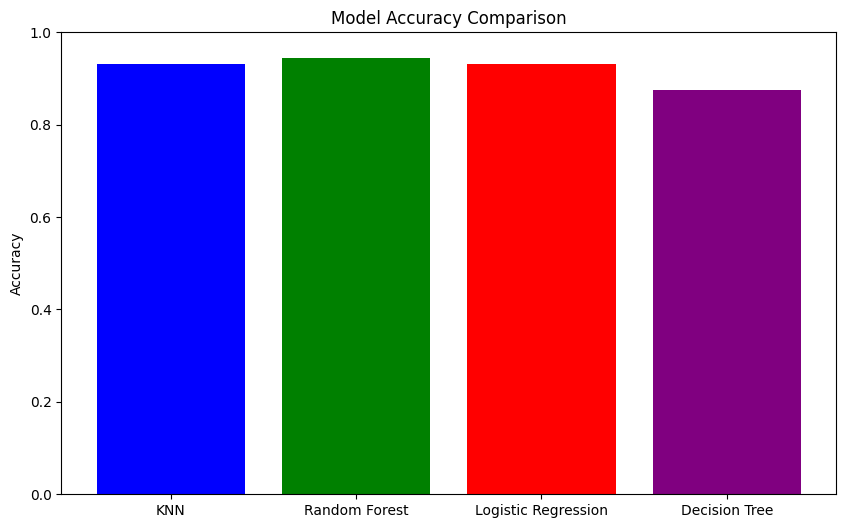

In [ ]:
import numpy as np

# Assuming the accuracy scores are stored in variables
accuracy_scores = {
    'KNN': accuracy_knn,
    'Random Forest': accuracy_rf,
    'Logistic Regression': accuracy_lr,
    'Decision Tree': accuracy_dt
}

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red', 'purple'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()
